In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
f = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/merged.csv')

In [3]:
"""
remove 'WK' from values in VISIT column, change dtype to int
"""
f.VISIT = f.VISIT.str.replace('WK', '').astype(int)

<Axes: title={'center': 'Positive Opiate Tests'}, xlabel='Week in Treatment', ylabel='Number of Positive Tests'>

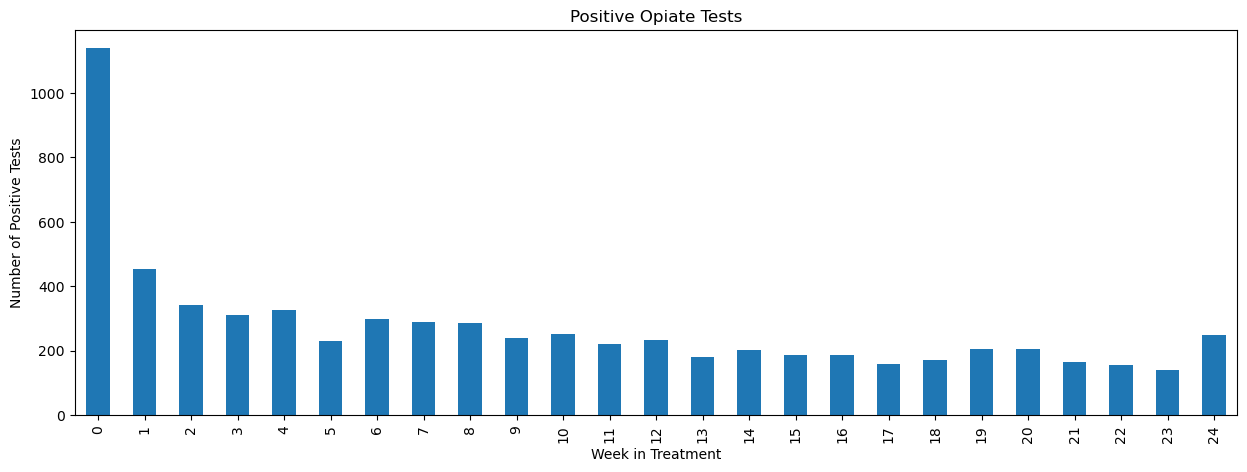

In [4]:
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(15,5), 
                                                   legend=False,
                                                   title='Positive Opiate Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests')

In [5]:
f.columns

Index(['patdeid', 'VISIT', 'medication', 'total_dose', 'admin_location',
       'sru_alcohol', 'alc_qty', 'sru_cannabis', 'sru_cocaine',
       'sru_amphetamine', 'sru_methamphetamine', 'sru_opiates',
       'sru_benzodiazepines', 'sru_propoxyphene', 'sru_methadone',
       'sru_oxycodone', 'sru_other', 't_alcohol', 'alc_result', 'urine_test',
       'refuse_reason', 'other_reason', 'urine_temp', 'supervised',
       't_Amphetamines', 't_Benzodiazapines', 't_Methadone', 't_Oxycodone',
       't_Cocaine', 't_Methamphetamine', 't_Opiate300', 't_Cannabinoids',
       't_Propoxyphene'],
      dtype='object')

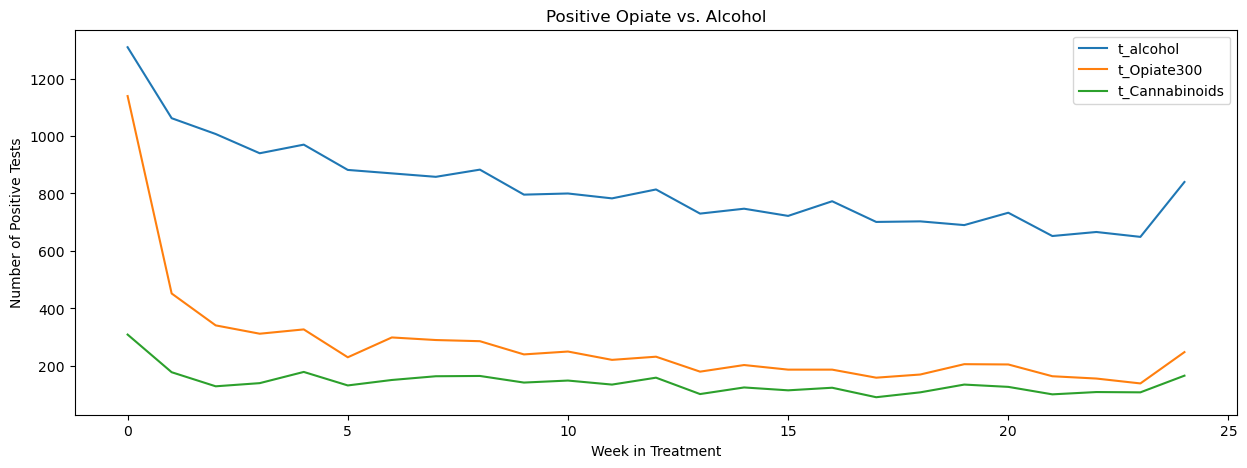

In [6]:
f.groupby('VISIT').agg({'t_alcohol':'sum',
                        't_Opiate300':'sum',
                        't_Cannabinoids':'sum'}).plot(kind='line', 
                                                   figsize=(15,5), 
                                                   legend=True,
                                                   title='Positive Opiate vs. Alcohol', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

In [16]:
# choose random sample from patdeid for plotting

f.patdeid.sample(1)

19520    1600
Name: patdeid, dtype: int64

In [8]:
# review columns for plotting
f.columns

Index(['patdeid', 'VISIT', 'medication', 'total_dose', 'admin_location',
       'sru_alcohol', 'alc_qty', 'sru_cannabis', 'sru_cocaine',
       'sru_amphetamine', 'sru_methamphetamine', 'sru_opiates',
       'sru_benzodiazepines', 'sru_propoxyphene', 'sru_methadone',
       'sru_oxycodone', 'sru_other', 't_alcohol', 'alc_result', 'urine_test',
       'refuse_reason', 'other_reason', 'urine_temp', 'supervised',
       't_Amphetamines', 't_Benzodiazapines', 't_Methadone', 't_Oxycodone',
       't_Cocaine', 't_Methamphetamine', 't_Opiate300', 't_Cannabinoids',
       't_Propoxyphene'],
      dtype='object')

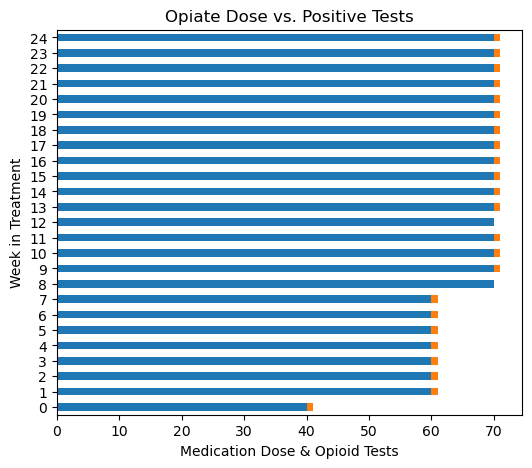

In [13]:
f.loc[f.patdeid==717].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, figsize=(6,5),
                                            title='Opiate Dose vs. Positive Tests',
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment');

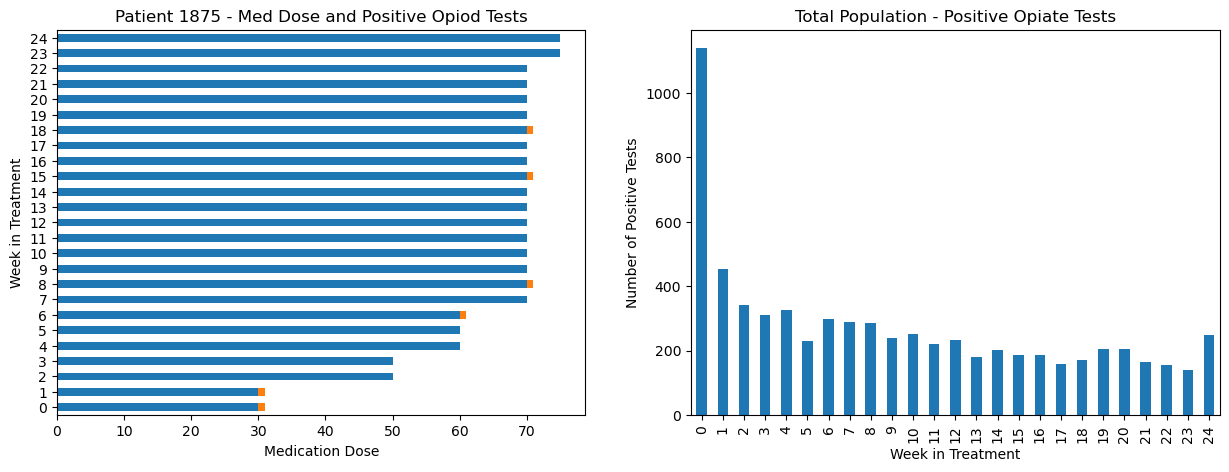

In [11]:
# create 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

f.loc[f.patdeid==1875].groupby('VISIT').agg({'total_dose':'sum',
                                            't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True,
                                            title='Patient 1875 - Med Dose and Positive Opioid Tests',
                                            ylabel='Week in Treatment',
                                            xlabel='Medication Dose',
                                            legend=False,ax=ax1);
                                            
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(15,5), 
                                                   legend=False,
                                                   title='Total Population - Positive Opioid Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests',
                                                   ax=ax2);


In [42]:
# random sampel for patient ID

f.patdeid.sample(1)

10290    870
Name: patdeid, dtype: int64

In [45]:
"""
create function that provides random sample from patdeid column, that takes df as input
"""
def random_sample(df):
    return df.patdeid.sample(1).values[0]

In [56]:
# Run this cell to see a random patient snapshot of medication and opioid tests

f.loc[f.patdeid==random_sample(f),
['patdeid','VISIT','medication','total_dose','t_Opiate300']][:25]

,patdeid,VISIT,medication,total_dose,t_Opiate300
1928,157,0,2.0,8.0,0.0
1929,157,1,2.0,12.0,0.0
1930,157,2,2.0,16.0,0.0
1931,157,3,2.0,24.0,0.0
1932,157,4,2.0,24.0,0.0
1933,157,5,2.0,24.0,0.0
1934,157,6,2.0,26.0,0.0
1935,157,7,2.0,26.0,0.0
1936,157,8,2.0,26.0,0.0
1937,157,9,2.0,26.0,0.0


In [57]:
"""
create column 'week_21_clean', if VISIT column is 24 & t_Opiate300 is 0, then 1, else 0
"""
f['week_21_clean'] = np.where((f.VISIT==24) & (f.t_Opiate300==0), 1, 0)

In [61]:
# review trends for week 24 in the dataset

f.loc[f.VISIT==24][:25]

,patdeid,VISIT,medication,total_dose,admin_location,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene,week_21_clean
24,1,24,2.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49,2,24,2.0,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
74,3,24,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
99,4,24,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,99.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
129,8,24,2.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
138,9,24,2.0,16.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
178,14,24,1.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
209,19,24,1.0,135.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
257,24,24,1.0,140.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
283,27,24,2.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
